In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
sns.set_theme()
tqdm.pandas()

## For the training data, we use the augmented data rather than the original

In [7]:
df_train = pd.read_csv("../../data/augmented_dataset/augmented_train_data.csv")
df_eval = pd.read_csv("../../data/original_dataset/original_val_data.csv")
df_test = pd.read_csv("../../data/original_dataset/original_test_data.csv")

## Training data without OOS for the initial clustering:

In [8]:
df_train_no_oos = df_train[df_train.label!="oos"]

In [9]:
df_train.shape, df_train_no_oos.shape

((30200, 2), (30000, 2))

In [10]:
df_train.label.value_counts()

confirm_reservation    200
change_accent          200
who_made_you           200
calendar_update        200
report_fraud           200
                      ... 
alarm                  200
bill_due               200
tire_change            200
meeting_schedule       200
insurance_change       200
Name: label, Length: 151, dtype: int64

# Sentence Transformers - MPNET

In [11]:
mpnet = SentenceTransformer("all-mpnet-base-v2")

In [12]:
sentence_embeddings = []
embedding_matrix = mpnet.encode(df_train_no_oos["query"].values)
for i in range(embedding_matrix.shape[0]):
  sentence_embeddings.append(embedding_matrix[i])  

df_train_no_oos["mpnet_embeddings_sentence"] = sentence_embeddings

<ipython-input-12-fb4de2061ae3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_no_oos["mpnet_embeddings_sentence"] = sentence_embeddings


# Clustering with 150 clusters for 150 intents

In [13]:
(df_train_no_oos["mpnet_embeddings_sentence"].values).shape

(30000,)

In [14]:
X = embedding_matrix
kmeans = KMeans(n_clusters=150, random_state=0)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Get distribution of each cluster

In [15]:
df_train_no_oos["cluster"] = clusters

<ipython-input-15-ed4596975abd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_no_oos["cluster"] = clusters


In [16]:
df_train_no_oos.groupby("cluster")["label"].value_counts(normalize=True)[:20]

cluster  label           
0        rewards_balance     0.507463
         redeem_rewards      0.447761
         new_card            0.029851
         balance             0.014925
1        pto_used            0.558442
         pto_balance         0.415584
         pto_request         0.025974
2        text                0.500000
         make_call           0.402116
         alarm               0.021164
         reminder_update     0.010582
         share_location      0.010582
         change_user_name    0.007937
         smart_home          0.007937
         next_song           0.005291
         todo_list_update    0.005291
         change_ai_name      0.002646
         find_phone          0.002646
         flip_coin           0.002646
         order_checks        0.002646
Name: label, dtype: float64

In [17]:
df_train_no_oos.groupby("label")["cluster"].value_counts(normalize=True)

label                cluster
accept_reservations  21         0.745
                     120        0.245
                     66         0.005
                     141        0.005
account_blocked      124        0.970
                                ...  
yes                  56         0.275
                     143        0.210
                     32         0.010
                     2          0.005
                     129        0.005
Name: cluster, Length: 690, dtype: float64

In [18]:
df_train_no_oos.iloc[0]

query                        can you check my reservations for mortons unde...
label                                                      confirm_reservation
mpnet_embeddings_sentence    [-0.03722523, 0.07223329, -0.016858665, 0.0936...
cluster                                                                    116
Name: 0, dtype: object

In [19]:
kmeans.transform(mpnet.encode([df_train_no_oos["query"].iloc[0]]))

array([[1.1393095 , 1.2127732 , 1.0056839 , 1.1554775 , 1.0221534 ,
        1.1848508 , 1.1187212 , 1.1592356 , 1.011503  , 1.0740016 ,
        1.0268927 , 1.146539  , 1.164491  , 1.1858628 , 1.1861933 ,
        1.0771923 , 1.1608479 , 1.2234731 , 1.1191927 , 1.2232095 ,
        1.1782984 , 0.80868286, 1.1155758 , 1.1722741 , 1.196751  ,
        1.1933237 , 1.0935552 , 1.087557  , 0.9888612 , 1.2383006 ,
        1.2110554 , 0.9437184 , 1.0987614 , 1.2186918 , 1.1781706 ,
        1.0797024 , 1.2172322 , 1.2137471 , 1.1823242 , 1.1020275 ,
        1.2168095 , 1.2150918 , 1.1322027 , 1.2171804 , 1.151868  ,
        1.216646  , 1.0315777 , 1.1628863 , 1.2632675 , 1.1314167 ,
        1.2551006 , 1.1270885 , 1.0193366 , 1.1327405 , 1.2172883 ,
        1.2293589 , 1.1009564 , 1.1133647 , 1.1344264 , 1.1754225 ,
        1.1079631 , 1.1308843 , 1.032964  , 1.1210265 , 1.133652  ,
        1.2022934 , 0.9684338 , 1.2515777 , 1.2643623 , 1.1450238 ,
        1.2049158 , 1.1193397 , 1.1619178 , 1.15

In [20]:
def compute_distance_of_closest_cluster(df):
    cluster_distances = kmeans.transform(mpnet.encode(df["query"].values))
    cluster_min_distances = cluster_distances.min(axis=1)
    df["min_distances"] = cluster_min_distances
    

In [21]:
compute_distance_of_closest_cluster(df_train_no_oos)

<ipython-input-20-fdf4798851b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["min_distances"] = cluster_min_distances


Text(0.5, 1.0, 'Distance to closest centres for in-scope intent queries')

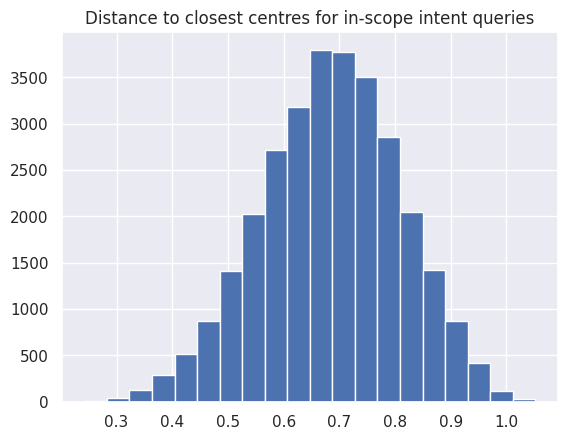

In [22]:
df_train_no_oos.min_distances.hist(bins=20)
plt.title("Distance to closest centres for in-scope intent queries")

In [23]:
df_train_oos = df_train[df_train.label=="oos"]

<ipython-input-20-fdf4798851b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["min_distances"] = cluster_min_distances


Text(0.5, 1.0, 'Distance to closest centres for out-of-scope intent queries')

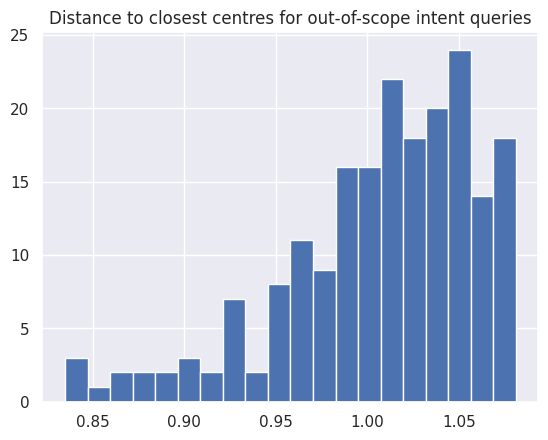

In [24]:
compute_distance_of_closest_cluster(df_train_oos)
df_train_oos.min_distances.hist(bins=20)
plt.title("Distance to closest centres for out-of-scope intent queries")

In [25]:
df_train_oos

,query,label,min_distances
22,how long is winter,oos,1.047784
259,how can i protect myself online,oos,0.990066
417,how fast does an airplane travel,oos,1.037231
925,please explain the catch rule to me,oos,1.016528
1086,can you list me tiger wood's stats,oos,1.001645
...,...,...,...
29759,are there any local stations covering the mora...,oos,0.977413
29786,can you send an email to client b,oos,1.002418
29821,how can i get involved in yoga,oos,1.039758
30013,how do i change my billing address,oos,0.912187


# Evaluating approach - OOS Recall

In [26]:
THRESHOLD = 0.95

In [27]:
compute_distance_of_closest_cluster(df_eval)

In [28]:
df_eval["pred"] = df_eval.min_distances.apply(lambda x: "oos" if x>THRESHOLD else "in-scope")

In [29]:
df_eval

,query,label,min_distances,pred
0,my account looks to be blocked and i have no i...,account_blocked,0.601392,in-scope
1,what are my recent purchases,transactions,0.649376,in-scope
2,"if i plan on travelling to this country, do i ...",international_visa,0.532687,in-scope
3,mark my calendar that i will be meeting steven...,calendar_update,0.819420,in-scope
4,i couldn't say,maybe,0.835065,in-scope
...,...,...,...,...
3095,i need a spider fact,fun_fact,0.811382,in-scope
3096,i'm sorry please repeat the question,repeat,0.795798,in-scope
3097,i prefer to be called jason,change_user_name,0.724365,in-scope
3098,dial the last number that called me,make_call,0.781903,in-scope


In [30]:
df_eval["binary_label"] =  df_eval.label.apply(lambda x: "oos" if x=="oos" else "in-scope")

In [31]:
pd.DataFrame(classification_report(df_eval["binary_label"], df_eval["pred"], output_dict=True)).T

,precision,recall,f1-score,support
in-scope,0.996281,0.982333,0.989258,3000.000000
oos,0.626761,0.890000,0.735537,100.000000
accuracy,0.979355,0.979355,0.979355,0.979355
macro avg,0.811521,0.936167,0.862398,3100.000000
weighted avg,0.984361,0.979355,0.981074,3100.000000


# Results on test set:

In [32]:
compute_distance_of_closest_cluster(df_test)

In [33]:
df_test["pred"] = df_test.min_distances.apply(lambda x: "oos" if x>THRESHOLD else "in-scope")
df_test["binary_label"] =  df_test.label.apply(lambda x: "oos" if x=="oos" else "in-scope")

In [34]:
pd.DataFrame(classification_report(df_test["binary_label"], df_test["pred"], output_dict=True)).T

,precision,recall,f1-score,support
in-scope,0.943734,0.984000,0.963446,4500.000000
oos,0.910891,0.736000,0.814159,1000.000000
accuracy,0.938909,0.938909,0.938909,0.938909
macro avg,0.927313,0.860000,0.888803,5500.000000
weighted avg,0.937763,0.938909,0.936303,5500.000000


As we can see, compared to the baseline results presented in the paper, this clustering algorithm performs much better, with an OOS recall of 0.73 as opposed to ~0.60 presented in the paper.

# What if we predict the class directly instead of just the binary task of whether an intent is in-scope or OOS?

## Assign each cluster to be associated with its most common intent:

In [39]:
cluster_id_to_intent = dict(df_train_no_oos.groupby("cluster")["label"].agg(pd.Series.mode))

In [40]:
cluster_id_to_intent

{0: 'rewards_balance',
 1: 'pto_used',
 2: 'text',
 3: 'gas',
 4: 'pto_request_status',
 5: 'next_song',
 6: 'new_card',
 7: 'report_lost_card',
 8: 'shopping_list_update',
 9: 'schedule_maintenance',
 10: 'restaurant_suggestion',
 11: 'timezone',
 12: 'are_you_a_bot',
 13: 'date',
 14: 'exchange_rate',
 15: 'routing',
 16: 'order_status',
 17: 'whisper_mode',
 18: 'meal_suggestion',
 19: 'tire_pressure',
 20: 'oil_change_how',
 21: 'accept_reservations',
 22: 'translate',
 23: array(['gas_type', 'mpg'], dtype=object),
 24: 'plug_type',
 25: 'payday',
 26: 'who_do_you_work_for',
 27: 'balance',
 28: 'how_busy',
 29: 'do_you_have_pets',
 30: 'apr',
 31: 'meeting_schedule',
 32: 'thank_you',
 33: 'sync_device',
 34: 'expiration_date',
 35: 'user_name',
 36: 'tire_change',
 37: 'alarm',
 38: 'income',
 39: 'greeting',
 40: 'flip_coin',
 41: 'international_fees',
 42: 'insurance',
 43: 'rollover_401k',
 44: 'where_are_you_from',
 45: 'meaning_of_life',
 46: 'share_location',
 47: 'calories

In [41]:
cluster_id_to_intent[23] = cluster_id_to_intent[23][0] # Because there are 2 values for cluster 23

In [42]:
print(f"Unique intents in the 150 clusters: {len(set(cluster_id_to_intent.values()))}")

Unique intents in the 150 clusters: 137


In [43]:
def assign_clusters_and_predict(df):
    clusters = kmeans.predict(mpnet.encode(df["query"].values))
    df["cluster"] = clusters
    df["cluster_prediction"] = df["cluster"].apply(lambda x: cluster_id_to_intent[x])
    

In [44]:
assign_clusters_and_predict(df_eval)

In [45]:
pd.DataFrame(classification_report(df_eval["label"], df_eval["cluster_prediction"], output_dict=True)).T

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
accept_reservations,0.833333,1.000000,0.909091,20.000000
account_blocked,0.952381,1.000000,0.975610,20.000000
alarm,1.000000,1.000000,1.000000,20.000000
application_status,1.000000,1.000000,1.000000,20.000000
apr,1.000000,1.000000,1.000000,20.000000
...,...,...,...,...
who_made_you,0.904762,0.950000,0.926829,20.000000
yes,0.072072,0.400000,0.122137,20.000000
accuracy,0.800968,0.800968,0.800968,0.800968
macro avg,0.783436,0.822185,0.788024,3100.000000


Since the accuracy is quite low compared to the baseline models presented in the paper, we do not continue with this method, and istead use the clustering only for the OOS predictions. 